# PCA(주성분 분석)

차원이 높아질 수록 표현이 어렵다.
차원 증가할 수록 연산(분석)어렵다
차원 축소가 필요하다

개요
차원이 클경우 차원의 ㅈ주와 학습 속도가 저하됨
같은 정보를 표현하는데 낮은 차원을 사용하여 정보를 표현하는 것을 차원 축소라고 함

차원축소시 정보의 손실이 발생 차원축소에서 중요한것은 정보의 손실을 최소화 하는것

PCA 는 고차원의 데이터를 저차원의 데이터로 환원시키는 기법
주성분 분석은 데이터를 한 개의 축으로 사상시켯을때 그 분산이 가장 커지는 축을 첫번째로 주성분 두번째로 커지는 축을 두번째 주성분으로 높이도록 새로운 좌표계로 데이터를 선형 변환한다.

공분산 행렬
공분산을 구하는 행렬
각 feature들 끼리 변동이 얼마나 닮았나 
수학적 의미 선형 변환



In [2]:
import pandas as pd
df = pd.DataFrame(columns = ['calory','breakfast','lunch','dinner','exercise','body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']
df.head()

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat


In [4]:
X=df[['calory','breakfast','lunch','dinner','exercise']]
X.head()

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0


In [5]:
Y = df[['body_shape']]
Y.head()

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat


## vector 표준화

In [7]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

## feature 간 공분산 행렬 계산

In [9]:
import numpy as np

features = x_std.T
coveriance_matrix = np.cov(features)
print(coveriance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


## 고유 벡터와 고유값 산출

In [13]:
eig_vals,eig_vecs = np.linalg.eig(coveriance_matrix)
print('Eigenvalues \n%s'%eig_vals)
print('Eigenvectors \n%s'%eig_vecs)

Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
Eigenvectors 
[[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]


## 고유백터를 기준으로 데이터를 투영

In [14]:
projected_X = x_std.dot(eig_vecs.T[0])
projected_X

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [15]:
result = pd.DataFrame(projected_X,columns = ['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result.head()

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat


Text(0.5, 1, 'PCA result')

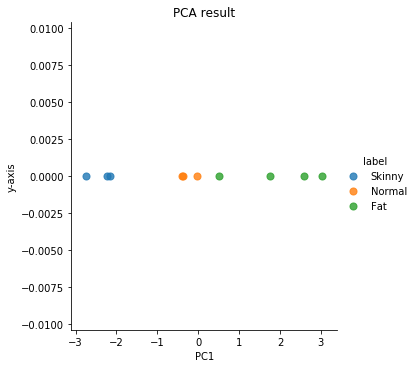

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.lmplot('PC1','y-axis',data=result,fit_reg = False,scatter_kws={'s':50},hue='label')
plt.title('PCA result')

# scikit-learn 활용 pca

In [20]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_pca_x

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

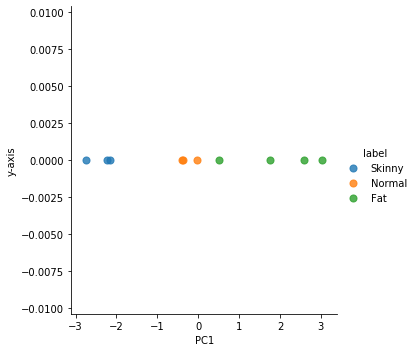

In [21]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y
sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False, scatter_kws={"s": 50},hue="label")

# SVD(특이값 분해)

In [24]:
A = np.array([[1,0,0,0,2],[0,0,3,0,0,],[0,0,0,0,0],[0,2,0,0,0]])

In [25]:
import numpy as np

U,s,VT = np.linalg.svd(A)

In [26]:
U

array([[ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 0.,  0.,  1.,  0.]])

In [27]:
s

array([3.        , 2.23606798, 2.        , 0.        ])

In [28]:
VT

array([[-0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.4472136 ,  0.        ,  0.        ,  0.        ,  0.89442719],
       [-0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.89442719,  0.        ,  0.        ,  0.        ,  0.4472136 ]])

In [42]:
a = np.array([[1,1,1,0,0],[3,3,3,0,0],[4,4,4,0,0,],[5,5,5,0,0],[0,2,0,4,4],[0,0,0,5,5,],[0,1,0,2,2]])
U,s,VT = np.linalg.svd(a)
# print(U)
print(np.diag(s))
# print(VT)

[[1.24810147e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 9.50861406e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.34555971e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.04642685e-16
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


Size(dimension): (1080, 1920)


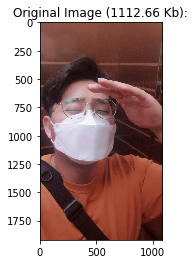

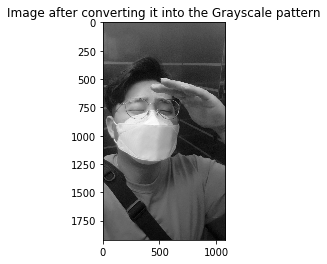

After comression:


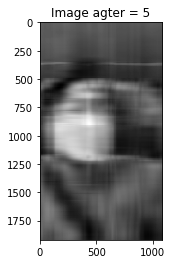

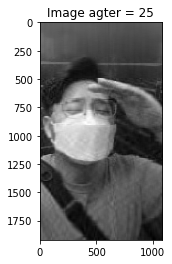

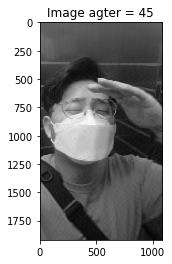

In [40]:
import os 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

path = 'test.jpg'
#이미지 파일 열기
img = Image.open(path)

#파일 크기 변환
s = float(os.path.getsize(path))/1000
print('Size(dimension):',img.size)
plt.title('Original Image (%0.2f Kb):'%s)
plt.imshow(img)

#gray 스케일로 변환
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

#이미지 크기(가로,세로)로 reshape
imgmat.shape = (imggray.size[1],imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat,cmap = 'gray')
plt.title('Image after converting it into the Grayscale pattern')
plt.show()

print('After comression:')
U,S,Vt = np.linalg.svd(imgmat)

# 5, 25,45 개의 특이값을 적용하여 이미지 압축
for i in range(5,51,20):
    #행과 열의 사이즈를 맞춰주는 작업
    cmpimg = np.matrix(U[:,:i])*np.diag(S[:i])*np.matrix(Vt[:i,:])
    plt.imshow(cmpimg,cmap = 'gray')
    title = 'Image agter = %s'%i
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg).astype(np.uint8))